Eitan Gantz, 314965914</br>
Itay Heilbron, 313327439

In [ ]:
from google.colab import drive
drive.mount('/content/drive')                                                           

Mounted at /content/drive


In [ ]:
import shutil

shutil.rmtree('/content/Models')
shutil.rmtree('/content/Results')
shutil.rmtree('/content/ut-zap50k-images-square')
!unzip "/content/drive/MyDrive/Colab_Notebooks/SHOECGAN/ut-zap50k-images-square.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058592.265680.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.137771.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.382709.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382712.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382713.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.84280.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.104236.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.186729.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8058601.173596.jpg  
  inflating: ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/PUMA/8

Removing noisy sunctional teypes of all major types.
</br>and some functional types  of shoes' because its too much for the collab gpu to process when we conduct heavy actions in the code.</br>
then counts the number of peactures in each major type to help us split the data sets.

In [ ]:

import os
import os.path as Path
from os import path
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
# 'Shoes/Flats', 'Shoes/Loafers', 'Shoes/Oxfords', 'Shoes/Heels',
remaining_types = ['Boots/Ankle', 'Boots/Knee High', 'Boots/Mid-Calf',
                   'Sandals/Flat', 'Shoes/Sneakers and Athletic Shoes', 
                   'Slippers/Slipper Flats']
path = r"/content/ut-zap50k-images-square"

for major_type in os.listdir(path):  
  for functional_type in os.listdir(path+'/'+major_type):
    if (major_type + '/' + functional_type) in remaining_types:
      print(functional_type + ' ' + 'V\n')
    else:
      print(functional_type + ' ' + 'X\n')
      shutil.rmtree(path+ '/' + major_type + '/' + functional_type)

for major_type in os.listdir(path):
  os.mkdir(path+ '/' + major_type + '/' + 'Train')
  os.mkdir(path+ '/' + major_type + '/' + 'Valid')
  os.mkdir(path+ '/' + major_type + '/' + 'Test')

  #getting the number of images in each major type, for splitting them each later to Train, Test and Valid.

num_of_picts={}
for major_type in os.listdir(path):
  count = 0
  for functional_type in os.listdir(path+'/'+major_type):
    for sub_func_type in os.listdir(path+'/'+major_type+'/'+functional_type):
      count += len([y for y in os.listdir(path+'/'+major_type+'/'+functional_type+'/'+ sub_func_type)])
  num_of_picts[major_type] = count
print(num_of_picts)

# for prob in os.listdir("/content/ut-zap50k-images-square/Shoes/Heels/L.A.M.B%2E"):
#   os.remove("/content/ut-zap50k-images-square/Shoes/Heels/L.A.M.B%2E" + '/' + prob)

#getting the number of pictures in each functional type for splitting each to 8:1:1

for major_type in os.listdir(path):
  count = 0
  for functional_type in os.listdir(path+'/'+major_type):
    if functional_type == 'Train' or functional_type == 'Test' or functional_type == 'Valid':
      continue    
    for sub_func_type in os.listdir(path+'/'+major_type+'/'+ functional_type):
      if sub_func_type == 'Train' or sub_func_type == 'Test' or sub_func_type == 'Valid':
        continue
      for subsub in os.listdir(path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type):
        if not subsub.endswith('.jpg'):
          continue
        if count <= (num_of_picts[major_type] * 0.8):
          file = path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type + '/' + subsub
          folder_name = path+ '/'+major_type + '/' + 'Train'
          if not os.path.isfile(path+ '/' + major_type + '/' + 'Train' + '/' + subsub):
            shutil.move(file, folder_name)
        elif count <= (num_of_picts[major_type] * 0.9):
          file = path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type + '/' + subsub
          folder_name = path+'/'+major_type + '/' + 'Valid'
          if not os.path.isfile(path+ '/' + major_type  + '/' + 'Valid' + '/' + subsub):
            shutil.move(file, folder_name)
        else:
          file = path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type + '/' + subsub
          folder_name = path+'/'+major_type + '/' + 'Test'
          shutil.move(file, folder_name)
        count+=1


for major_type in os.listdir(path):
  for functional_type in os.listdir(path + '/' + major_type):
    if functional_type == 'Train' or functional_type == 'Test' or functional_type == 'Valid':
      continue
    for sub_func_type in os.listdir(path + '/' + major_type + '/' + functional_type):
      if sub_func_type != 'Train' and sub_func_type != 'Test' and sub_func_type != 'Valid':
        os.rmdir(path + '/' + major_type + '/' + functional_type+'/'+sub_func_type)
      else:
        os.remove(path + '/' + major_type + '/' + functional_type+'/'+sub_func_type)
    if functional_type != 'Train' and functional_type != 'Test' and functional_type != 'Valid':
      os.rmdir(path + '/' + major_type + '/' + functional_type)
      



Train X

Test X

Valid X

Slipper Flats V

Train X

Test X

Valid X

Sneakers and Athletic Shoes V

Flat V

Train X

Test X

Valid X

Train X

Test X

Knee High V

Ankle V

Valid X

Mid-Calf V

{'Slippers': 1259, 'Shoes': 12859, 'Sandals': 5601, 'Boots': 12783}


Some example for the PIL library wich we use to load the pictures.

In [ ]:
import PIL

from PIL import Image
from numpy import asarray



image = Image.open('/content/ut-zap50k-images-square/Sandals/Train/102307.14.jpg')
image = image.resize((256,256), Image.ANTIALIAS)
image.save(os.path.join('/content/ut-zap50k-images-square/Boots', "images", '/content/ut-zap50k-images-square/Boots/Test/101178.238499.jpg'))

X_train = asarray([asarray(image),asarray(image)])

random_image = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[random_image])
plt.title(f"Training example #{random_image}")
plt.axis('off')
plt.show()


Creating data structure which allow us to choose data set from: Shoes, Boots, Sandals and Slippers.</br>
for changing data set, replace your choise in lines with #!!!</br>
We don't load the whole data,only what required for the specific train, because it's heavy and crashes the session...

In [ ]:
majors_level = {}
for major_type in os.listdir(path):
  print(major_type)
  set_level = {}
  global shoe
  if major_type != 'Shoes':#!!!
    continue
  for data_set in os.listdir(path + '/' + major_type):
    if data_set != 'Train':
      continue
    imgs_list = []
    flag = 0
    for img in os.listdir(path + '/' + major_type + '/' + data_set):
      image = Image.open(path + '/' + major_type + '/' + data_set + '/' + img)
      image = image.resize((256,256), Image.ANTIALIAS)
      try:
        #########################################################################
        temp = np.array(image.convert('RGB'), dtype='float32')
        imgs_list.append(temp / 255)
        imgs_list.append(np.flip(imgs_list[-1], 1))
        #########################################################################
      except Exception as e:
        print(f"{e}, {asarray(image).shape}")
      if flag == 0:
        print(asarray(image).shape)
        flag = 1
    try:
      set_level[data_set] = imgs_list
    except Exception as e:
      print("An exception occurred: ", e)
  majors_level[major_type] = set_level

import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# batch size
batch_size = 64
# train set
train_data = majors_level['Shoes']['Train']#!!!
print(type(train_data))
batch_index = 0



Slippers
Shoes
(256, 256, 3)
Sandals
Boots
<class 'list'>


In [ ]:
import random

from math import floor


def zero():
    return np.random.uniform(0.0, 0.01, size = [1])

def one():
    return np.random.uniform(0.99, 1.0, size = [1])

def noise(n):
    return np.random.uniform(-1.0, 1.0, size = [n, 4096])

print("Importing Images...")

Images = train_data
for image in Images:
  image = np.resize(image, (256, 256))
print(type(Images[0]))

Importing Images...
<class 'numpy.ndarray'>


DCGAN (deep net) architcture, which gave us better resullts by far from shalow GAN. (We tried the net from ex 5 and the reslts wasn't good, so we've figured that deep nets might do better work, and so it was...) 

In [ ]:
from keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dense, AveragePooling2D, GaussianNoise
from keras.layers import Reshape, UpSampling2D, Activation, Dropout, Flatten, Conv2DTranspose
from keras.models import model_from_json, Sequential
from keras.optimizers import Adam

    
class GAN(object):
    
    def __init__(self):
        
        #Models
        self.D = None # the discriminator
        self.G = None # the
        
        self.OD = None
        
        self.DM = None # the discriminator for the run of the train
        self.AM = None # the combinatin of the 
        
        #Config
        self.LR = 0.0001
        self.steps = 1
        
    def discriminator(self):
        
        if self.D:
            return self.D
        
        self.D = Sequential()
        
        #add Gaussian noise to prevent Discriminator overfitting
        self.D.add(GaussianNoise(0.2, input_shape = [256, 256, 3]))
        
        #256x256x3 Image
        self.D.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same'))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())
        
        #128x128x8
        self.D.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())
        
        #64x64x16
        self.D.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())
        
        #32x32x32
        self.D.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())
        
        #16x16x64
        self.D.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())
        
        #8x8x128
        self.D.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same'))
        self.D.add(BatchNormalization(momentum = 0.7))
        self.D.add(LeakyReLU(0.2))
        self.D.add(Dropout(0.25))
        self.D.add(AveragePooling2D())
        
        #4x4x256
        self.D.add(Flatten())
        
        #256
        self.D.add(Dense(128))
        self.D.add(LeakyReLU(0.2))
        
        self.D.add(Dense(1, activation = 'sigmoid'))
        
        return self.D
    
    def generator(self):
        
        if self.G:
            return self.G
        
        self.G = Sequential()
        
        self.G.add(Reshape(target_shape = [1, 1, 4096], input_shape = [4096]))
        
        #1x1x4096 
        self.G.add(Conv2DTranspose(filters = 256, kernel_size = 4))
        self.G.add(Activation('relu'))
        
        #4x4x256 - kernel sized increased by 1
        self.G.add(Conv2D(filters = 256, kernel_size = 4, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())
        
        #8x8x256 - kernel sized increased by 1
        self.G.add(Conv2D(filters = 128, kernel_size = 4, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())
        
        #16x16x128
        self.G.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())
        
        #32x32x64
        self.G.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())
        
        #64x64x32
        self.G.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same'))
        self.G.add(BatchNormalization(momentum = 0.7))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())
        
        #128x128x16
        self.G.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same'))
        self.G.add(Activation('relu'))
        self.G.add(UpSampling2D())
        
        #256x256x8
        self.G.add(Conv2D(filters = 3, kernel_size = 3, padding = 'same'))
        self.G.add(Activation('sigmoid'))
        
        return self.G
    
    def DisModel(self):
        
        if self.DM == None:
            self.DM = Sequential()
            self.DM.add(self.discriminator())
        
        self.DM.compile(optimizer = Adam(lr = self.LR * (0.85 ** floor(self.steps / 10000))), loss = 'binary_crossentropy')
        
        return self.DM
    
    def AdModel(self):
        
        if self.AM == None:
            self.AM = Sequential()
            self.AM.add(self.generator())
            self.AM.add(self.discriminator())
            
        self.AM.compile(optimizer = Adam(lr = self.LR * (0.85 ** floor(self.steps / 10000))), loss = 'binary_crossentropy')
        
        return self.AM
    
    def sod(self):
        
        self.OD = self.D.get_weights()
        
    def lod(self):
        
        self.D.set_weights(self.OD)



class Model_GAN(object):
    
    def __init__(self):
        
        self.GAN = GAN()
        self.DisModel = self.GAN.DisModel()
        self.AdModel = self.GAN.AdModel()
        self.generator = self.GAN.generator()
        
    def train(self, batch = 16):
        
        (a, b) = self.train_dis(batch)
        c = self.train_gen(batch)
        
        print(f"D Real: {str(a)}, D Fake: {str(b)}, G All: {str(c)}")
        
        if self.GAN.steps % 500 == 0:
            self.save(floor(self.GAN.steps / 1000))
            self.evaluate()
            
        if self.GAN.steps % 5000 == 0:
            self.GAN.AM = None
            self.GAN.DM = None
            self.AdModel = self.GAN.AdModel()
            self.DisModel = self.GAN.DisModel()
        
        self.GAN.steps = self.GAN.steps + 1

    # the discrimainator loss calculation    
    def train_dis(self, batch):
        
        #Get Real Images
        im_no = random.randint(0, len(Images) - batch - 1)
        train_data = Images[im_no : im_no + int(batch / 2)]
        label_data = []
        for i in range(int(batch / 2)):
            label_data.append(zero())
            
        d_loss_real = self.DisModel.train_on_batch(np.array(train_data), np.array(label_data))
        
        #Get Fake Images
        train_data = self.generator.predict(noise(int(batch / 2)))
        label_data = []
        for i in range(int(batch / 2)):
            label_data.append(one())
            
        d_loss_fake = self.DisModel.train_on_batch(train_data, np.array(label_data))
        
        return (d_loss_real, d_loss_fake)
        
    def train_gen(self, batch):
        
        self.GAN.sod()
        
        label_data = []
        for i in range(int(batch)):
            label_data.append(zero())
        
        g_loss = self.AdModel.train_on_batch(noise(batch), np.array(label_data))
        
        self.GAN.lod()
        
        return g_loss

    # showing the images from dataset(real) and from generator(one that showed to discriminator and one for general picture generation)
    def evaluate(self):
        
        im_no = random.randint(0, len(Images) - 1)
        im1 = Images[im_no]
        
        im2 = self.generator.predict(noise(2))
        
        plt.figure(1)
        plt.imshow(im1)
        
        plt.figure(2)
        plt.imshow(im2[0])
        
        plt.figure(3)
        plt.imshow(im2[1])
        
        plt.show()
        
    #saving pictures and models in directories    
    def save(self, num):
        gen_json = self.GAN.G.to_json()
        dis_json = self.GAN.D.to_json()

        with open("Models/gen.json", "w+") as json_file:
            json_file.write(gen_json)

        with open("Models/dis.json", "w+") as json_file:
            json_file.write(dis_json)

        self.GAN.G.save_weights("Models/gen"+str(num)+".h5")
        self.GAN.D.save_weights("Models/dis"+str(num)+".h5")

        print(f"Model number {str(num)} Saved!")

    def load(self, num):
        steps1 = self.GAN.steps
        
        self.GAN = None
        self.GAN = GAN()

        #Generator
        gen_file = open("Models/gen.json", 'r')
        gen_json = gen_file.read()
        gen_file.close()
        
        self.GAN.G = model_from_json(gen_json)
        self.GAN.G.load_weights("Models/gen"+str(num)+".h5")

        #Discriminator
        dis_file = open("Models/dis.json", 'r')
        dis_json = dis_file.read()
        dis_file.close()
        
        self.GAN.D = model_from_json(dis_json)
        self.GAN.D.load_weights("Models/dis"+str(num)+".h5")

        #Reinitialize
        self.generator = self.GAN.generator()
        self.DisModel = self.GAN.DisModel()
        self.AdModel = self.GAN.AdModel()
        
        self.GAN.steps = steps1
        
    def eval2(self, num = 0):
        
        im2 = self.generator.predict(noise(48))
        
        r1 = np.concatenate(im2[:8], axis = 1)
        r2 = np.concatenate(im2[8:16], axis = 1)
        r3 = np.concatenate(im2[16:24], axis = 1)
        r4 = np.concatenate(im2[24:32], axis = 1)
        r5 = np.concatenate(im2[32:40], axis = 1)
        r6 = np.concatenate(im2[40:48], axis = 1)
        
        c1 = np.concatenate([r1, r2, r3, r4, r5, r6], axis = 0)
        
        x = Image.fromarray(np.uint8(c1*255))
        
        x.save("Results/i"+str(num)+".png")
        
       
        
       

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise (GaussianNois (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 8)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)     

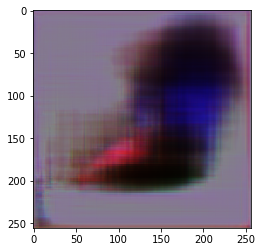

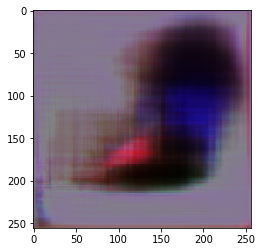

D Real: 0.038032449781894684, D Fake: 0.09466443210840225, G All: 4.015327453613281
D Real: 0.04483776167035103, D Fake: 0.04246218875050545, G All: 4.021026611328125
D Real: 0.038144201040267944, D Fake: 0.047574542462825775, G All: 4.877437591552734
D Real: 0.04712739959359169, D Fake: 0.03945126011967659, G All: 5.317069053649902
D Real: 0.043454382568597794, D Fake: 0.038954369723796844, G All: 5.122039794921875
D Real: 0.035088688135147095, D Fake: 0.03552597388625145, G All: 5.758035659790039
D Real: 0.040530428290367126, D Fake: 0.03550361096858978, G All: 5.83643102645874
D Real: 0.06110893189907074, D Fake: 0.03201240673661232, G All: 5.47892427444458
D Real: 0.01916259527206421, D Fake: 0.05142281576991081, G All: 5.666313171386719
D Real: 0.049914464354515076, D Fake: 0.027416646480560303, G All: 5.488531112670898
D Real: 0.04495874419808388, D Fake: 0.03353703022003174, G All: 4.678145408630371
D Real: 0.0871366411447525, D Fake: 0.04194286838173866, G All: 4.00404548645019

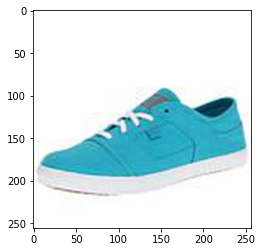

D Real: 0.14436878263950348, D Fake: 0.06106291338801384, G All: 7.599118709564209
D Real: 0.9140867590904236, D Fake: 0.0384037047624588, G All: 3.6154966354370117
D Real: 0.037344396114349365, D Fake: 0.22355523705482483, G All: 1.6692609786987305
D Real: 0.0544142872095108, D Fake: 0.6141843199729919, G All: 3.0268523693084717
D Real: 0.04920954257249832, D Fake: 0.04783608019351959, G All: 5.922621250152588
D Real: 0.055150438100099564, D Fake: 0.037121519446372986, G All: 7.965830326080322
D Real: 0.0384582057595253, D Fake: 0.039462365210056305, G All: 8.981593132019043
D Real: 0.03432873636484146, D Fake: 0.0367470383644104, G All: 10.10534381866455
D Real: 0.1000053659081459, D Fake: 0.038797441869974136, G All: 10.364120483398438
D Real: 0.27763426303863525, D Fake: 0.04992717504501343, G All: 9.745363235473633
D Real: 0.22264376282691956, D Fake: 0.034218862652778625, G All: 8.510713577270508
D Real: 0.5052859783172607, D Fake: 0.03878122568130493, G All: 7.2470526695251465
D

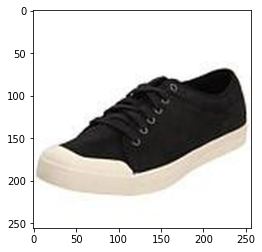

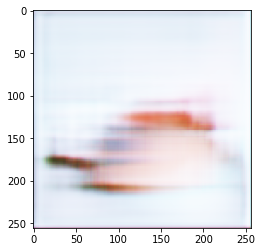

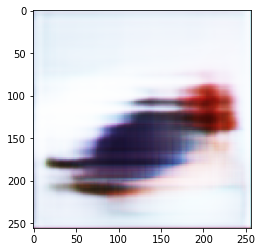

D Real: 0.1318381130695343, D Fake: 0.04343455657362938, G All: 5.8942341804504395
D Real: 0.04736543074250221, D Fake: 0.036314886063337326, G All: 5.761728286743164
D Real: 0.17058631777763367, D Fake: 0.044189292937517166, G All: 5.283995628356934
D Real: 0.06189999729394913, D Fake: 0.05087178573012352, G All: 4.02209997177124
D Real: 0.03162378817796707, D Fake: 0.03495987132191658, G All: 3.077011823654175
D Real: 0.053900349885225296, D Fake: 0.11211171001195908, G All: 2.9195139408111572
D Real: 0.15440991520881653, D Fake: 0.039189741015434265, G All: 3.1025338172912598
D Real: 0.04188254103064537, D Fake: 0.397924542427063, G All: 2.780089855194092
D Real: 0.0421362929046154, D Fake: 0.0495448000729084, G All: 4.099002361297607
D Real: 0.07435503602027893, D Fake: 0.029007315635681152, G All: 4.646762847900391
D Real: 0.06802166253328323, D Fake: 0.0590079203248024, G All: 5.876741409301758
D Real: 0.03424438089132309, D Fake: 0.032541386783123016, G All: 5.9339070320129395
D

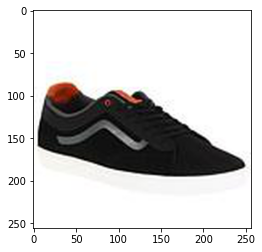

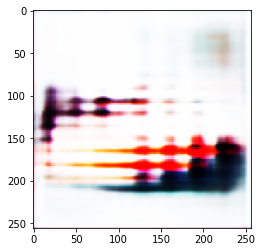

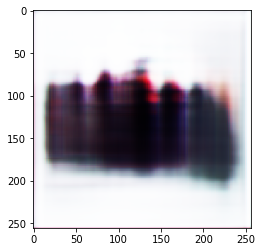

D Real: 0.04297912120819092, D Fake: 0.04949332773685455, G All: 3.140512466430664
D Real: 0.09132351726293564, D Fake: 0.10373643785715103, G All: 2.4450788497924805
D Real: 0.04526660591363907, D Fake: 0.21988998353481293, G All: 3.076446056365967
D Real: 0.29264795780181885, D Fake: 0.08266094326972961, G All: 3.5581231117248535
D Real: 0.22255270183086395, D Fake: 0.07378898561000824, G All: 3.518874168395996
D Real: 0.08548910915851593, D Fake: 0.1110500693321228, G All: 3.2925779819488525
D Real: 0.28115713596343994, D Fake: 0.06255673617124557, G All: 2.8164939880371094
D Real: 0.3727785348892212, D Fake: 0.6221801042556763, G All: 2.754672050476074
D Real: 0.06956306099891663, D Fake: 0.12034144997596741, G All: 2.932760715484619
D Real: 0.07310454547405243, D Fake: 0.10698721557855606, G All: 3.9322853088378906
D Real: 0.11550267040729523, D Fake: 0.10920870304107666, G All: 3.9804739952087402
D Real: 0.04544048383831978, D Fake: 0.05693746358156204, G All: 3.3654749393463135


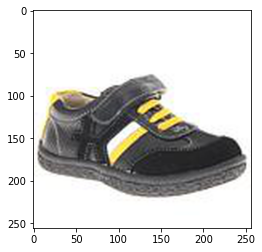

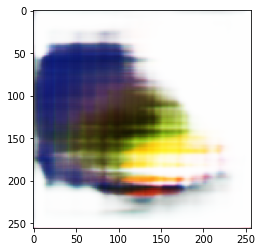

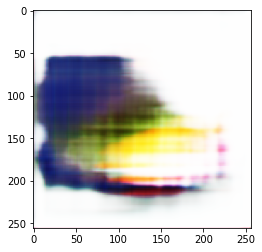

D Real: 0.04841531813144684, D Fake: 0.03980514779686928, G All: 3.870697259902954
D Real: 0.3533360958099365, D Fake: 0.055183231830596924, G All: 2.2689528465270996
D Real: 0.2317466288805008, D Fake: 0.26690053939819336, G All: 1.8979300260543823
D Real: 0.030426934361457825, D Fake: 0.5522825121879578, G All: 2.0485551357269287
D Real: 0.07193746417760849, D Fake: 0.14218740165233612, G All: 3.743875503540039
D Real: 0.06391949951648712, D Fake: 0.05374862998723984, G All: 5.434337615966797
D Real: 0.02853301540017128, D Fake: 0.0425136499106884, G All: 7.168871879577637
D Real: 0.24329774081707, D Fake: 0.04754199460148811, G All: 6.535079002380371
D Real: 0.6795415878295898, D Fake: 0.04683374613523483, G All: 5.9242963790893555
D Real: 0.034882258623838425, D Fake: 0.06443183124065399, G All: 5.373514652252197
D Real: 0.04722645878791809, D Fake: 0.1385754942893982, G All: 4.392176151275635
D Real: 0.05409448966383934, D Fake: 0.2181476354598999, G All: 5.196765899658203
D Real:

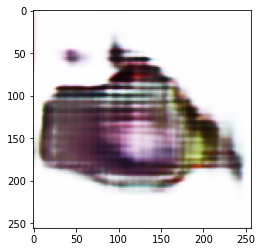

D Real: 0.05204348638653755, D Fake: 0.07248397916555405, G All: 3.186300754547119
D Real: 1.447840929031372, D Fake: 0.32976359128952026, G All: 1.1598777770996094
D Real: 0.04822155833244324, D Fake: 1.3836193084716797, G All: 0.8147501349449158
D Real: 0.12021981179714203, D Fake: 0.9070528745651245, G All: 2.0540904998779297
D Real: 0.04919576272368431, D Fake: 0.10739219188690186, G All: 4.17020845413208
D Real: 0.09744341671466827, D Fake: 0.039919011294841766, G All: 5.877262592315674
D Real: 0.04814319312572479, D Fake: 0.03304988890886307, G All: 7.778843879699707
D Real: 0.11892122030258179, D Fake: 0.047198448330163956, G All: 7.97696590423584
D Real: 2.19559383392334, D Fake: 0.030476439744234085, G All: 5.853102684020996
D Real: 1.113905668258667, D Fake: 0.09917561709880829, G All: 2.640272855758667
D Real: 0.053959719836711884, D Fake: 0.32616570591926575, G All: 1.477407455444336
D Real: 0.02610321342945099, D Fake: 1.0348236560821533, G All: 1.726808786392212
D Real: 0

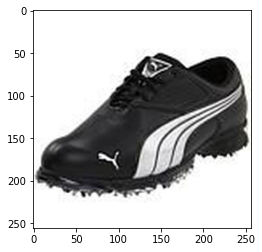

D Real: 0.7696702480316162, D Fake: 0.04334806650876999, G All: 7.693258285522461
D Real: 1.481748104095459, D Fake: 0.040338847786188126, G All: 3.964881420135498
D Real: 0.37399327754974365, D Fake: 0.043966565281152725, G All: 3.5344080924987793
D Real: 0.048085544258356094, D Fake: 0.45972710847854614, G All: 2.380732536315918
D Real: 0.04232419654726982, D Fake: 0.45390379428863525, G All: 1.724802017211914
D Real: 0.0381990410387516, D Fake: 0.1989562064409256, G All: 2.8257365226745605
D Real: 0.05996158719062805, D Fake: 0.311086505651474, G All: 3.1876397132873535
D Real: 0.027056097984313965, D Fake: 0.12214946001768112, G All: 3.850492000579834
D Real: 0.10734351724386215, D Fake: 0.061204031109809875, G All: 3.6414856910705566
D Real: 0.03292573615908623, D Fake: 0.12399730831384659, G All: 4.98110294342041
D Real: 0.2357884794473648, D Fake: 0.10607290267944336, G All: 4.958400726318359
D Real: 0.039139509201049805, D Fake: 0.08524952828884125, G All: 5.721517086029053
D R

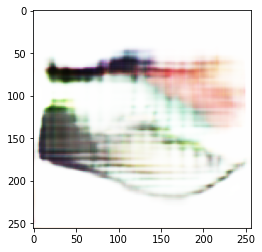

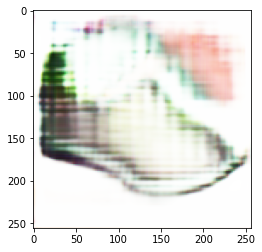

D Real: 0.03660953789949417, D Fake: 0.044375259429216385, G All: 3.5386500358581543
D Real: 0.05120982974767685, D Fake: 0.08338479697704315, G All: 3.6013760566711426
D Real: 0.18672624230384827, D Fake: 0.06559939682483673, G All: 3.5219531059265137
D Real: 0.027658069506287575, D Fake: 0.18980363011360168, G All: 3.838202953338623
D Real: 0.033918190747499466, D Fake: 0.04985133558511734, G All: 4.459206581115723
D Real: 0.038627974689006805, D Fake: 0.07896514981985092, G All: 4.90281867980957
D Real: 0.046540517359972, D Fake: 0.036607395857572556, G All: 5.785367012023926
D Real: 0.6880514025688171, D Fake: 0.03210555016994476, G All: 5.019564628601074
D Real: 0.055720482021570206, D Fake: 0.11181162297725677, G All: 3.397993564605713
D Real: 0.04483187943696976, D Fake: 0.17261385917663574, G All: 3.3720695972442627
D Real: 0.18198689818382263, D Fake: 0.13675308227539062, G All: 2.9433088302612305
D Real: 0.028916511684656143, D Fake: 0.19149881601333618, G All: 3.583226442337

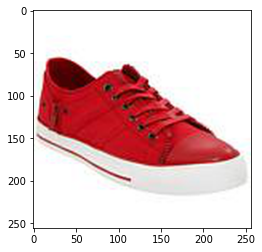

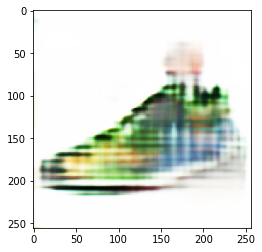

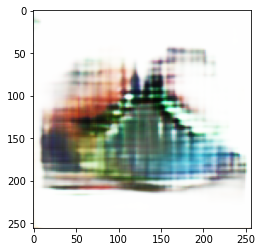

D Real: 0.04749909043312073, D Fake: 0.05193553864955902, G All: 3.3991589546203613
D Real: 0.03027186170220375, D Fake: 0.8857893943786621, G All: 3.7099926471710205
D Real: 0.04424642026424408, D Fake: 0.05459287762641907, G All: 3.16190242767334
D Real: 0.3930826783180237, D Fake: 0.05919116362929344, G All: 3.6298775672912598
D Real: 0.32096582651138306, D Fake: 0.07684798538684845, G All: 3.9051687717437744
D Real: 0.11148397624492645, D Fake: 0.06792236864566803, G All: 3.4992544651031494
D Real: 0.11572566628456116, D Fake: 0.27515941858291626, G All: 3.156956672668457
D Real: 0.13595296442508698, D Fake: 0.30580785870552063, G All: 2.9344282150268555
D Real: 0.8549468517303467, D Fake: 0.23803523182868958, G All: 1.9737493991851807
D Real: 0.24618329107761383, D Fake: 0.2678670287132263, G All: 2.091294765472412
D Real: 0.042582836002111435, D Fake: 0.8845996260643005, G All: 3.896885633468628
D Real: 0.05644753575325012, D Fake: 0.14313055574893951, G All: 3.8607254028320312
D

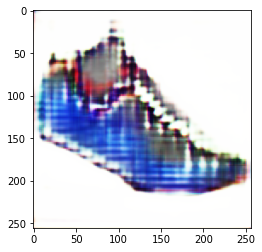

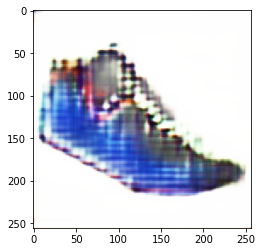

D Real: 0.03778976574540138, D Fake: 0.2751285135746002, G All: 4.647799491882324
D Real: 0.2018873691558838, D Fake: 0.05458048731088638, G All: 4.282477855682373
D Real: 0.23965267837047577, D Fake: 0.030544571578502655, G All: 4.689066410064697
D Real: 0.8894863724708557, D Fake: 0.45659053325653076, G All: 2.457998514175415
D Real: 0.18836934864521027, D Fake: 0.10734789818525314, G All: 1.5131423473358154
D Real: 0.043555475771427155, D Fake: 0.5503952503204346, G All: 1.8192310333251953
D Real: 0.048938386142253876, D Fake: 0.18231183290481567, G All: 2.574129581451416
D Real: 0.04519716277718544, D Fake: 0.23637932538986206, G All: 2.56402587890625
D Real: 0.7790515422821045, D Fake: 0.15370085835456848, G All: 2.5428690910339355
D Real: 0.41364070773124695, D Fake: 0.05178012698888779, G All: 1.4782030582427979
D Real: 0.06917552649974823, D Fake: 0.2706556022167206, G All: 1.145676851272583
D Real: 0.21786019206047058, D Fake: 0.43244117498397827, G All: 1.4516130685806274
D R

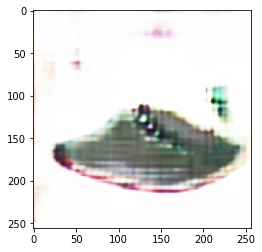

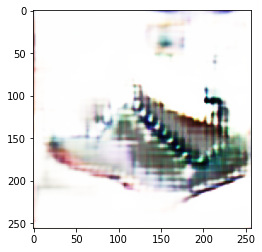

D Real: 0.1503889262676239, D Fake: 0.631773829460144, G All: 1.2978836297988892
D Real: 0.029198843985795975, D Fake: 0.34482595324516296, G All: 1.1492846012115479
D Real: 0.03857530653476715, D Fake: 0.44067198038101196, G All: 1.3656927347183228
D Real: 0.22425222396850586, D Fake: 0.6206103563308716, G All: 2.3232057094573975
D Real: 0.6707639694213867, D Fake: 0.27340036630630493, G All: 1.8861205577850342
D Real: 0.3259003758430481, D Fake: 0.2532757520675659, G All: 1.9609572887420654
D Real: 0.20405641198158264, D Fake: 0.5099806785583496, G All: 2.273219108581543
D Real: 0.04522915184497833, D Fake: 0.36806610226631165, G All: 2.7015342712402344
D Real: 0.17657604813575745, D Fake: 0.10124719887971878, G All: 3.050515651702881
D Real: 0.07536737620830536, D Fake: 0.15402543544769287, G All: 3.6197500228881836
D Real: 0.13454151153564453, D Fake: 0.22609683871269226, G All: 3.2874913215637207
D Real: 0.13516798615455627, D Fake: 0.0586543008685112, G All: 4.0802083015441895
D 

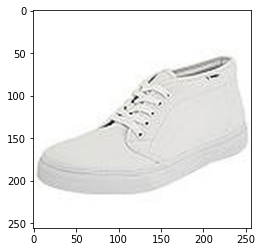

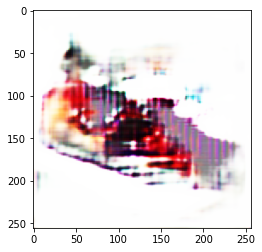

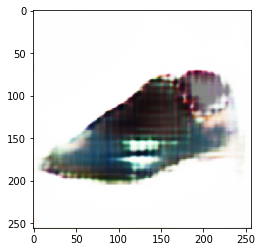

D Real: 0.052216701209545135, D Fake: 0.03623902425169945, G All: 4.495915412902832
D Real: 0.3559083640575409, D Fake: 0.04873225837945938, G All: 3.1681528091430664
D Real: 0.35304558277130127, D Fake: 0.3605554699897766, G All: 1.706246018409729
D Real: 0.049785714596509933, D Fake: 1.0301406383514404, G All: 1.5104206800460815
D Real: 0.02886193059384823, D Fake: 0.1983206570148468, G All: 2.2628893852233887
D Real: 0.033526334911584854, D Fake: 0.06636965274810791, G All: 3.9289393424987793
D Real: 0.03914813697338104, D Fake: 0.07720157504081726, G All: 4.44154167175293
D Real: 0.8029744029045105, D Fake: 0.08692431449890137, G All: 3.8171937465667725
D Real: 0.0819513201713562, D Fake: 0.05913892760872841, G All: 3.9912757873535156
D Real: 0.10244113206863403, D Fake: 0.052098631858825684, G All: 2.805908203125
D Real: 0.34448301792144775, D Fake: 0.4121483266353607, G All: 2.5173180103302
D Real: 0.9529448747634888, D Fake: 0.7281790375709534, G All: 1.581578016281128
D Real: 0

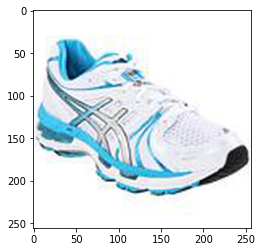

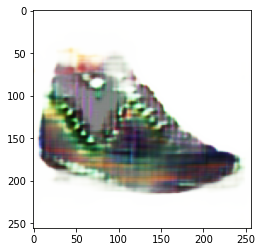

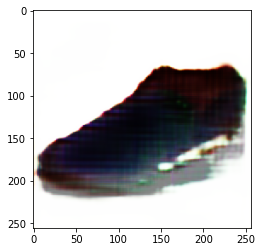

D Real: 0.10821130871772766, D Fake: 0.3193685710430145, G All: 1.4253439903259277
D Real: 0.08407517522573471, D Fake: 0.06860795617103577, G All: 2.6590099334716797
D Real: 0.03284362703561783, D Fake: 0.3069707155227661, G All: 4.181295871734619
D Real: 0.15760260820388794, D Fake: 0.497072696685791, G All: 5.008196830749512
D Real: 0.14612025022506714, D Fake: 0.050000905990600586, G All: 6.212680339813232
D Real: 0.30859485268592834, D Fake: 0.042798615992069244, G All: 5.742831230163574
D Real: 1.003021001815796, D Fake: 0.07936380058526993, G All: 4.6076507568359375
D Real: 0.13242265582084656, D Fake: 0.041523583233356476, G All: 2.796462059020996
D Real: 0.10550221055746078, D Fake: 0.042526975274086, G All: 2.241901159286499
D Real: 0.06549111008644104, D Fake: 1.6293339729309082, G All: 3.469168186187744
D Real: 0.16899490356445312, D Fake: 0.3508749008178711, G All: 3.6831741333007812
D Real: 0.25467920303344727, D Fake: 0.04193327575922012, G All: 4.292912483215332
D Real:

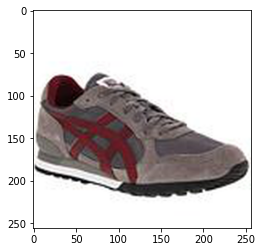

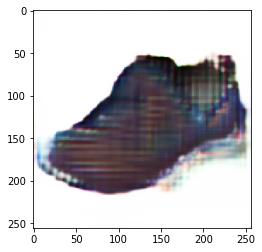

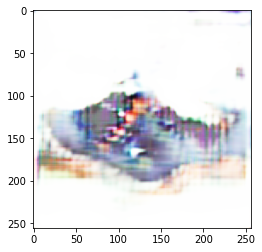

D Real: 0.47940176725387573, D Fake: 0.1285114288330078, G All: 5.127170562744141
D Real: 0.18825897574424744, D Fake: 0.04937300086021423, G All: 5.187372207641602
D Real: 3.9266364574432373, D Fake: 0.025681115686893463, G All: 4.029454231262207
D Real: 1.656474232673645, D Fake: 0.047105468809604645, G All: 2.075335741043091
D Real: 0.04051491618156433, D Fake: 0.6356329917907715, G All: 1.342078685760498
D Real: 0.10458758473396301, D Fake: 0.9445550441741943, G All: 1.2088401317596436
D Real: 0.059156112372875214, D Fake: 0.9847090244293213, G All: 1.174126386642456
D Real: 0.048462554812431335, D Fake: 0.49965065717697144, G All: 1.8345577716827393
D Real: 0.03459548205137253, D Fake: 0.4208972156047821, G All: 1.6414086818695068
D Real: 0.695866048336029, D Fake: 0.41139674186706543, G All: 3.0990548133850098
D Real: 1.4279406070709229, D Fake: 0.04732481390237808, G All: 3.2610678672790527
D Real: 0.12374240159988403, D Fake: 0.16521680355072021, G All: 4.1813273429870605
D Rea

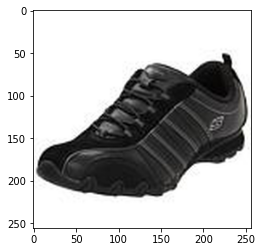

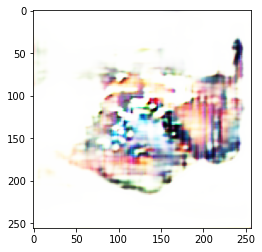

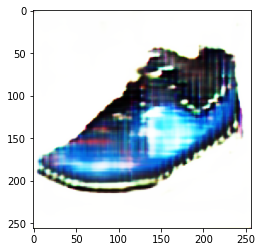

D Real: 0.4223211109638214, D Fake: 0.09950894862413406, G All: 3.8498895168304443
D Real: 0.2288336604833603, D Fake: 0.20957526564598083, G All: 2.853498697280884
D Real: 0.0507974699139595, D Fake: 0.20712602138519287, G All: 3.0054869651794434
D Real: 0.1298612654209137, D Fake: 0.09218862652778625, G All: 3.072183132171631
D Real: 0.07435285300016403, D Fake: 0.10754261910915375, G All: 2.6134839057922363
D Real: 0.20836497843265533, D Fake: 0.18801893293857574, G All: 2.532130718231201
D Real: 0.07669325172901154, D Fake: 0.09871125966310501, G All: 2.232365846633911
D Real: 0.11401189863681793, D Fake: 0.18971654772758484, G All: 2.2679624557495117
D Real: 0.07474121451377869, D Fake: 0.05796467512845993, G All: 2.306544065475464
D Real: 0.2710007131099701, D Fake: 0.22813767194747925, G All: 2.839322328567505
D Real: 0.2694873511791229, D Fake: 0.23495906591415405, G All: 2.1432933807373047
D Real: 0.22835737466812134, D Fake: 0.12220316380262375, G All: 1.8743817806243896
D Re

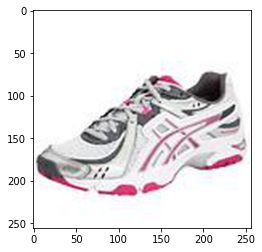

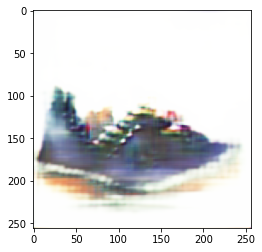

D Real: 0.7635741829872131, D Fake: 0.09390723705291748, G All: 3.372997522354126
D Real: 0.15965183079242706, D Fake: 0.38645607233047485, G All: 3.1060242652893066
D Real: 0.12937447428703308, D Fake: 0.08785536140203476, G All: 3.0505597591400146
D Real: 0.046086736023426056, D Fake: 0.45099982619285583, G All: 3.136521339416504
D Real: 0.05696382746100426, D Fake: 0.08220033347606659, G All: 3.568190574645996
D Real: 0.07146091759204865, D Fake: 0.5021158456802368, G All: 4.945539474487305
D Real: 1.1922698020935059, D Fake: 0.4357106685638428, G All: 5.7408246994018555
D Real: 0.2564310133457184, D Fake: 0.04932983219623566, G All: 5.8418474197387695
D Real: 0.1727983057498932, D Fake: 0.04158077389001846, G All: 4.838955879211426
D Real: 0.14289897680282593, D Fake: 0.05239070579409599, G All: 4.900505065917969
D Real: 0.24953126907348633, D Fake: 0.07382924854755402, G All: 4.68667459487915
D Real: 0.04095274955034256, D Fake: 0.04586777836084366, G All: 3.3418307304382324
D Rea

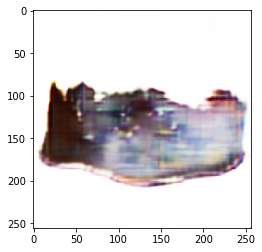

D Real: 0.03750459477305412, D Fake: 0.043702855706214905, G All: 4.208802223205566
D Real: 0.2892208695411682, D Fake: 0.08112753927707672, G All: 4.994462013244629
D Real: 1.5814576148986816, D Fake: 0.12742078304290771, G All: 3.2403244972229004
D Real: 0.16124975681304932, D Fake: 0.11440026015043259, G All: 1.8212491273880005
D Real: 0.046491362154483795, D Fake: 0.7642104625701904, G All: 1.366771936416626
D Real: 0.0327831469476223, D Fake: 0.5459429621696472, G All: 1.4692094326019287
D Real: 0.04452602192759514, D Fake: 0.31653058528900146, G All: 2.9643144607543945
D Real: 0.11674151569604874, D Fake: 0.1258562207221985, G All: 4.068596839904785
D Real: 0.4324743151664734, D Fake: 0.1623789370059967, G All: 5.03115701675415
D Real: 0.5881550312042236, D Fake: 0.07774672657251358, G All: 3.6058249473571777
D Real: 0.8831996321678162, D Fake: 0.17382435500621796, G All: 3.2570858001708984
D Real: 0.5912806987762451, D Fake: 0.11888442933559418, G All: 2.010867118835449
D Real: 

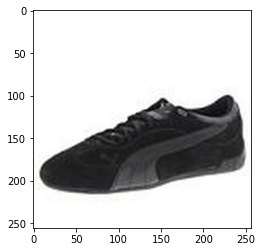

D Real: 0.21385374665260315, D Fake: 0.12678608298301697, G All: 2.3765323162078857
D Real: 0.0473945215344429, D Fake: 0.648726224899292, G All: 3.1308398246765137
D Real: 0.08058378100395203, D Fake: 0.07084275782108307, G All: 3.05444073677063
D Real: 0.21832938492298126, D Fake: 0.03338810056447983, G All: 3.5736682415008545
D Real: 0.04374048113822937, D Fake: 0.0585358589887619, G All: 4.305018901824951
D Real: 0.049211397767066956, D Fake: 0.08894188702106476, G All: 3.2218856811523438
D Real: 0.30443501472473145, D Fake: 0.027581356465816498, G All: 3.6758649349212646
D Real: 0.09630123525857925, D Fake: 0.05941183492541313, G All: 2.233856678009033
D Real: 0.024540212005376816, D Fake: 0.27436763048171997, G All: 3.099031448364258
D Real: 0.1390233188867569, D Fake: 0.16016188263893127, G All: 2.865321397781372
D Real: 0.09482260793447495, D Fake: 0.09010335803031921, G All: 2.542722225189209
D Real: 0.06324418634176254, D Fake: 0.23523031175136566, G All: 4.042269706726074
D 

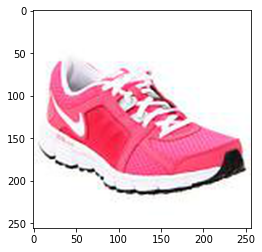

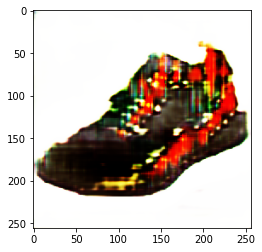

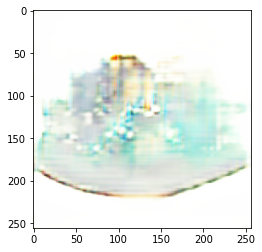

D Real: 0.10597141832113266, D Fake: 0.11022219061851501, G All: 2.9866743087768555
D Real: 0.032554347068071365, D Fake: 0.2733384966850281, G All: 2.810436725616455
D Real: 0.17255081236362457, D Fake: 0.5035978555679321, G All: 1.9057588577270508
D Real: 0.4031684100627899, D Fake: 0.09169119596481323, G All: 2.757115602493286
D Real: 0.2597713768482208, D Fake: 0.06957309693098068, G All: 2.6171517372131348
D Real: 0.06940141320228577, D Fake: 0.6161141395568848, G All: 2.0270798206329346
D Real: 0.048963651061058044, D Fake: 0.14797767996788025, G All: 3.5460081100463867
D Real: 0.4430038630962372, D Fake: 0.047432322055101395, G All: 4.876728534698486
D Real: 1.3037660121917725, D Fake: 0.0340983122587204, G All: 2.804631233215332
D Real: 0.09180678427219391, D Fake: 0.3395145833492279, G All: 2.357527017593384
D Real: 0.2961413860321045, D Fake: 0.28082191944122314, G All: 1.4871928691864014
D Real: 0.04809248074889183, D Fake: 0.5734927654266357, G All: 2.425778865814209
D Real

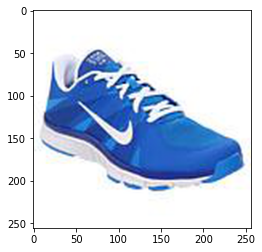

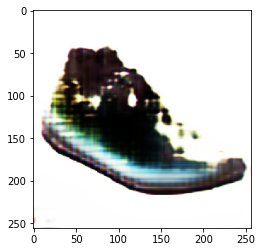

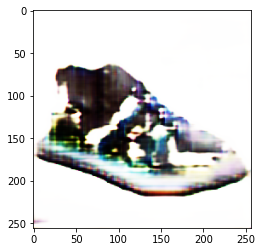

D Real: 0.3997501730918884, D Fake: 0.42474231123924255, G All: 1.5426952838897705
D Real: 0.03751261532306671, D Fake: 2.158140182495117, G All: 2.3300352096557617
D Real: 0.04094003885984421, D Fake: 0.07924080640077591, G All: 3.7023682594299316
D Real: 0.3010728657245636, D Fake: 0.12954822182655334, G All: 4.479165077209473
D Real: 0.4091556668281555, D Fake: 0.06813276559114456, G All: 4.295592308044434
D Real: 0.5113284587860107, D Fake: 0.03719010949134827, G All: 3.5942435264587402
D Real: 0.4165036082267761, D Fake: 0.042627424001693726, G All: 2.863469123840332
D Real: 0.08877222239971161, D Fake: 0.24889661371707916, G All: 1.9186921119689941
D Real: 0.07692425698041916, D Fake: 0.18807163834571838, G All: 1.9483084678649902
D Real: 0.0815155953168869, D Fake: 0.20652425289154053, G All: 1.6277179718017578
D Real: 0.039126113057136536, D Fake: 0.24263745546340942, G All: 1.7475364208221436
D Real: 0.16923069953918457, D Fake: 0.13026095926761627, G All: 1.800619125366211
D 

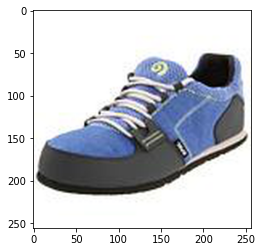

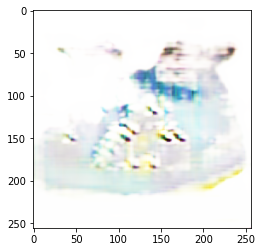

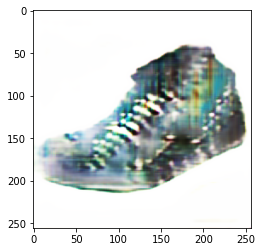

D Real: 0.19249297678470612, D Fake: 0.1384439319372177, G All: 2.624490261077881
D Real: 0.2224089801311493, D Fake: 0.3987578749656677, G All: 2.8549299240112305
D Real: 0.3706616759300232, D Fake: 0.1002441942691803, G All: 2.3873140811920166
D Real: 0.04567801207304001, D Fake: 0.1456802487373352, G All: 2.5183804035186768
D Real: 0.03080994077026844, D Fake: 0.29086247086524963, G All: 2.7563416957855225
D Real: 0.04385983571410179, D Fake: 0.26555848121643066, G All: 4.030495643615723
D Real: 0.4912227392196655, D Fake: 0.06768366694450378, G All: 4.974837303161621
D Real: 0.05426962673664093, D Fake: 0.14177031815052032, G All: 4.516366004943848
D Real: 0.08213447034358978, D Fake: 0.03384599834680557, G All: 4.038701057434082
D Real: 0.960543155670166, D Fake: 0.034911736845970154, G All: 3.1872053146362305
D Real: 0.19715672731399536, D Fake: 0.11183948069810867, G All: 2.0664355754852295
D Real: 0.035999588668346405, D Fake: 0.6107949018478394, G All: 2.588749408721924
D Real

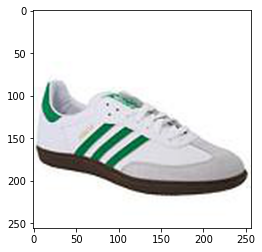

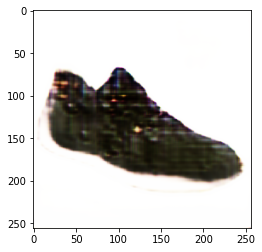

D Real: 0.04727950692176819, D Fake: 0.2531186044216156, G All: 2.0139687061309814
D Real: 0.28745728731155396, D Fake: 0.08178562670946121, G All: 3.6695711612701416
D Real: 0.06739743798971176, D Fake: 0.17931874096393585, G All: 3.4318785667419434
D Real: 0.19590067863464355, D Fake: 0.05935988575220108, G All: 3.669257402420044
D Real: 0.22814342379570007, D Fake: 0.043717898428440094, G All: 3.3281002044677734
D Real: 0.353161484003067, D Fake: 0.051747970283031464, G All: 4.254339694976807
D Real: 0.09323705732822418, D Fake: 0.06460127979516983, G All: 2.6464319229125977
D Real: 0.15676568448543549, D Fake: 0.07970067113637924, G All: 2.8515450954437256
D Real: 0.03897269442677498, D Fake: 0.4099578261375427, G All: 2.6844899654388428
D Real: 0.05444084480404854, D Fake: 0.060858048498630524, G All: 2.7866482734680176
D Real: 0.06741078197956085, D Fake: 0.5393977165222168, G All: 4.169165134429932
D Real: 0.05404378101229668, D Fake: 0.04565146565437317, G All: 3.92722868919372

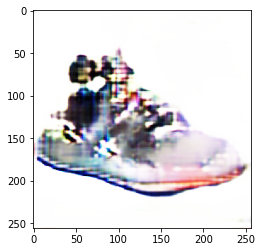

D Real: 0.15268149971961975, D Fake: 0.10415975749492645, G All: 1.9483599662780762
D Real: 0.029662195593118668, D Fake: 0.3655804395675659, G All: 1.3171355724334717
D Real: 0.04164343327283859, D Fake: 0.7770578861236572, G All: 1.460066795349121
D Real: 0.03301410377025604, D Fake: 0.15532049536705017, G All: 2.559460163116455
D Real: 0.03529944270849228, D Fake: 0.20400433242321014, G All: 4.047077178955078
D Real: 0.04994681850075722, D Fake: 0.09625963866710663, G All: 4.579482078552246
D Real: 0.03239559382200241, D Fake: 0.03237726539373398, G All: 5.562285900115967
D Real: 1.6065895557403564, D Fake: 0.040169935673475266, G All: 4.414109230041504
D Real: 0.3920542001724243, D Fake: 0.044332608580589294, G All: 4.9470534324646
D Real: 0.10130316019058228, D Fake: 0.04812591150403023, G All: 3.340916395187378
D Real: 0.1188383474946022, D Fake: 0.09223482012748718, G All: 3.195371389389038
D Real: 0.4279899001121521, D Fake: 0.07576953619718552, G All: 2.043297290802002
D Real:

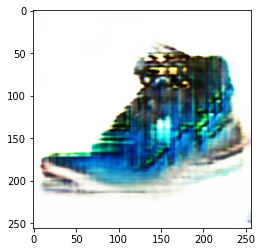

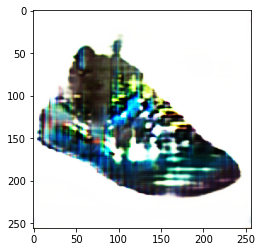

D Real: 0.03797496110200882, D Fake: 0.09804747998714447, G All: 2.848245620727539
D Real: 0.2964640259742737, D Fake: 0.39736348390579224, G All: 3.792160987854004
D Real: 0.04677363485097885, D Fake: 0.08247852325439453, G All: 3.83903169631958
D Real: 0.09194786101579666, D Fake: 0.20542991161346436, G All: 3.717617988586426
D Real: 0.24777811765670776, D Fake: 0.2312873899936676, G All: 4.387914657592773
D Real: 0.9011443853378296, D Fake: 0.1309235692024231, G All: 3.7642152309417725
D Real: 0.11947393417358398, D Fake: 0.09497898817062378, G All: 3.3457255363464355
D Real: 0.04922395199537277, D Fake: 0.10110864043235779, G All: 3.5627493858337402
D Real: 1.091321587562561, D Fake: 0.07191018760204315, G All: 1.940362811088562
D Real: 0.1466054469347, D Fake: 0.2901778817176819, G All: 1.2344869375228882
D Real: 0.06312534213066101, D Fake: 0.7246828675270081, G All: 2.01680850982666
D Real: 0.044198956340551376, D Fake: 0.23132763803005219, G All: 2.234304666519165
D Real: 0.125

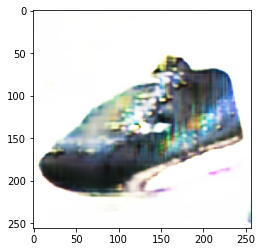

D Real: 0.15373069047927856, D Fake: 0.03237393498420715, G All: 3.972367525100708
D Real: 0.3030220866203308, D Fake: 0.04184629023075104, G All: 3.4065802097320557
D Real: 0.034863173961639404, D Fake: 0.4127761125564575, G All: 4.221098899841309
D Real: 0.10860564559698105, D Fake: 0.0884215384721756, G All: 4.411836624145508
D Real: 0.049607351422309875, D Fake: 0.07727603614330292, G All: 2.8899989128112793
D Real: 0.039724547415971756, D Fake: 0.04300953447818756, G All: 3.5388896465301514
D Real: 0.0788687914609909, D Fake: 0.1685732901096344, G All: 3.439474582672119
D Real: 0.086815744638443, D Fake: 0.5955160856246948, G All: 3.646850824356079
D Real: 0.18005847930908203, D Fake: 0.09194523096084595, G All: 4.749802589416504
D Real: 0.19330094754695892, D Fake: 0.055645812302827835, G All: 4.215543270111084
D Real: 0.9978735446929932, D Fake: 0.05736200883984566, G All: 3.333632469177246
D Real: 0.4191925525665283, D Fake: 0.08519330620765686, G All: 2.1590499877929688
D Real

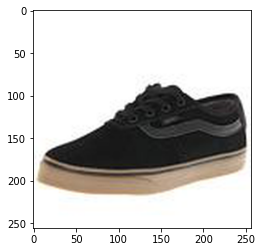

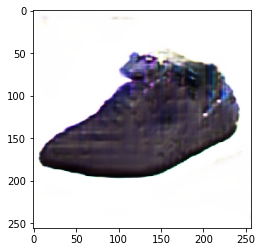

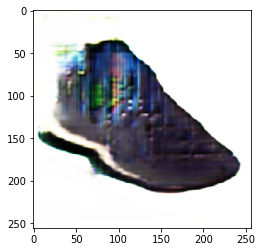

D Real: 0.11577587574720383, D Fake: 0.041115157306194305, G All: 4.0273613929748535
D Real: 0.05253911390900612, D Fake: 0.0614425390958786, G All: 4.366701602935791
D Real: 0.3327886462211609, D Fake: 0.06418999284505844, G All: 3.980471134185791
D Real: 0.08705483376979828, D Fake: 0.04167040437459946, G All: 4.247561454772949
D Real: 0.098239004611969, D Fake: 0.044952064752578735, G All: 2.9482696056365967
D Real: 0.13316453993320465, D Fake: 0.3115503489971161, G All: 3.5353281497955322
D Real: 0.028040509670972824, D Fake: 0.03940461575984955, G All: 3.200434684753418
D Real: 0.045243099331855774, D Fake: 0.049593813717365265, G All: 3.5621860027313232
D Real: 0.06045408546924591, D Fake: 0.13731715083122253, G All: 3.393991470336914
D Real: 0.19518820941448212, D Fake: 0.10990867018699646, G All: 3.3599672317504883
D Real: 0.04098913073539734, D Fake: 0.0799025222659111, G All: 1.6368108987808228
D Real: 0.08028857409954071, D Fake: 0.23417487740516663, G All: 2.686329364776611

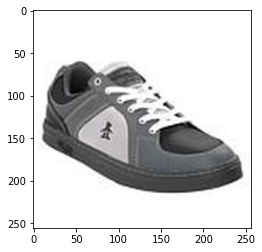

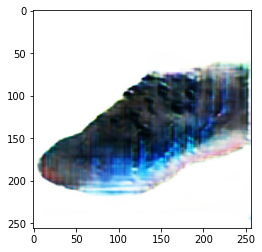

D Real: 0.0539255365729332, D Fake: 0.14647451043128967, G All: 2.052194118499756
D Real: 0.06402850151062012, D Fake: 0.08522218465805054, G All: 1.4967458248138428
D Real: 0.0451558455824852, D Fake: 0.1225096583366394, G All: 2.842099666595459
D Real: 0.043722134083509445, D Fake: 0.2007414698600769, G All: 2.6070315837860107
D Real: 0.05676276981830597, D Fake: 0.18205121159553528, G All: 2.991206169128418
D Real: 0.04660717397928238, D Fake: 0.362173855304718, G All: 2.5342719554901123
D Real: 0.03424789384007454, D Fake: 0.054956696927547455, G All: 5.014385223388672
D Real: 0.3417804539203644, D Fake: 0.05654565989971161, G All: 4.1098408699035645
D Real: 0.050746046006679535, D Fake: 0.037678323686122894, G All: 4.527519226074219
D Real: 0.02764764055609703, D Fake: 0.22986741364002228, G All: 3.982562303543091
D Real: 0.07049606740474701, D Fake: 0.06526169925928116, G All: 4.189178466796875
D Real: 0.19287769496440887, D Fake: 0.05151806026697159, G All: 3.9497299194335938
D 

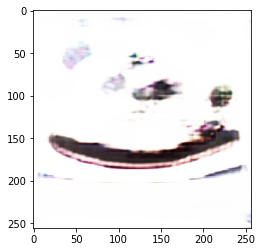

D Real: 0.12320855259895325, D Fake: 0.10567544400691986, G All: 2.4011244773864746
D Real: 0.14553464949131012, D Fake: 0.10335404425859451, G All: 3.4866323471069336
D Real: 0.23473775386810303, D Fake: 0.07051187753677368, G All: 3.852415084838867
D Real: 0.1653691530227661, D Fake: 0.075758196413517, G All: 3.794677257537842
D Real: 1.2349644899368286, D Fake: 0.14325867593288422, G All: 3.346900224685669
D Real: 0.08371144533157349, D Fake: 0.23842331767082214, G All: 2.5496530532836914
D Real: 0.03204429894685745, D Fake: 0.37957099080085754, G All: 3.129380941390991
D Real: 0.38127222657203674, D Fake: 0.10081781446933746, G All: 2.417489767074585
D Real: 0.040762778371572495, D Fake: 0.16594919562339783, G All: 2.2712783813476562
D Real: 0.0365479402244091, D Fake: 0.47438716888427734, G All: 2.5247280597686768
D Real: 0.05604115128517151, D Fake: 0.3999960124492645, G All: 3.6414151191711426
D Real: 0.6205369234085083, D Fake: 0.09434571862220764, G All: 3.771350145339966
D Re

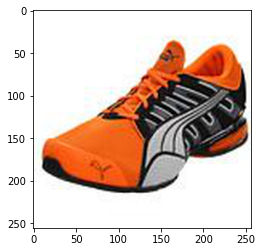

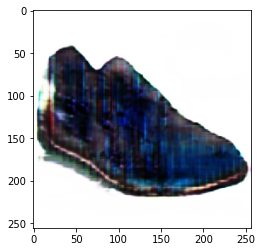

D Real: 0.20246294140815735, D Fake: 0.635856032371521, G All: 2.4003429412841797
D Real: 0.505956768989563, D Fake: 0.05808190628886223, G All: 3.5672731399536133
D Real: 0.5926289558410645, D Fake: 0.09002985060214996, G All: 3.0694618225097656
D Real: 0.24016469717025757, D Fake: 0.2392054796218872, G All: 4.093861103057861
D Real: 0.4587515592575073, D Fake: 0.05001412332057953, G All: 3.0373716354370117
D Real: 0.10590919852256775, D Fake: 0.06844563782215118, G All: 2.4971752166748047
D Real: 0.09285052120685577, D Fake: 0.14360255002975464, G All: 2.4664063453674316
D Real: 0.12434990704059601, D Fake: 0.14724785089492798, G All: 2.3196399211883545
D Real: 0.04636739194393158, D Fake: 0.1718321144580841, G All: 2.712156057357788
D Real: 0.11609674990177155, D Fake: 0.4541359841823578, G All: 3.5940537452697754
D Real: 0.07546968758106232, D Fake: 0.18050852417945862, G All: 3.0025463104248047
D Real: 0.08755773305892944, D Fake: 0.1027669757604599, G All: 2.757551431655884
D Rea

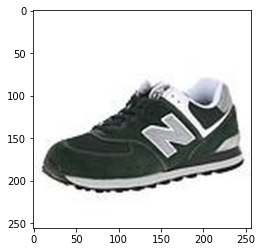

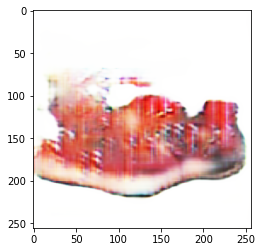

D Real: 0.047750286757946014, D Fake: 0.5378363132476807, G All: 1.7331476211547852
D Real: 0.0603090301156044, D Fake: 0.13510403037071228, G All: 4.367916107177734
D Real: 0.8535705804824829, D Fake: 0.07539477944374084, G All: 3.2082953453063965
D Real: 1.1135094165802002, D Fake: 0.12649983167648315, G All: 3.0044281482696533
D Real: 0.8061020374298096, D Fake: 0.24107535183429718, G All: 2.369093894958496
D Real: 0.08642417937517166, D Fake: 0.7934529185295105, G All: 1.2869184017181396
D Real: 0.0385543629527092, D Fake: 0.7838189005851746, G All: 1.413800597190857
D Real: 0.07608814537525177, D Fake: 0.932889461517334, G All: 1.6406246423721313
D Real: 0.18379251658916473, D Fake: 0.15657886862754822, G All: 2.503906488418579
D Real: 0.19907915592193604, D Fake: 0.036418985575437546, G All: 3.180325984954834
D Real: 0.11188653111457825, D Fake: 0.1823316216468811, G All: 3.381803512573242
D Real: 0.04855911433696747, D Fake: 0.060995426028966904, G All: 3.5814714431762695
D Real

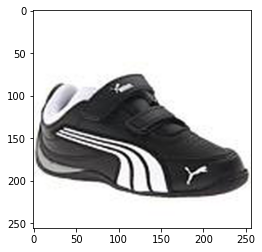

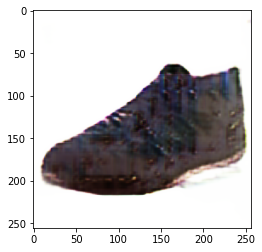

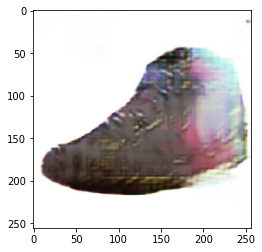

D Real: 0.20544171333312988, D Fake: 1.139777421951294, G All: 1.2443628311157227
D Real: 0.04529651254415512, D Fake: 0.6131928563117981, G All: 2.671393871307373
D Real: 0.25059932470321655, D Fake: 0.23741884529590607, G All: 4.21027946472168
D Real: 0.1305646449327469, D Fake: 0.046570904552936554, G All: 4.089622497558594
D Real: 0.6142096519470215, D Fake: 0.07250542938709259, G All: 3.9059348106384277
D Real: 2.1197638511657715, D Fake: 0.06850377470254898, G All: 3.988567590713501
D Real: 0.2562994658946991, D Fake: 0.4183419644832611, G All: 1.8325550556182861
D Real: 0.9501875042915344, D Fake: 0.04588787257671356, G All: 1.4249753952026367
D Real: 0.12929360568523407, D Fake: 0.34897300601005554, G All: 1.362770676612854
D Real: 0.083274707198143, D Fake: 1.0411403179168701, G All: 1.228739619255066
D Real: 0.18925972282886505, D Fake: 0.5248810648918152, G All: 1.5953357219696045
D Real: 0.11457639932632446, D Fake: 0.32320624589920044, G All: 1.4515568017959595
D Real: 0.0

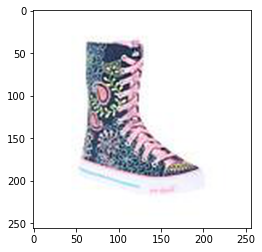

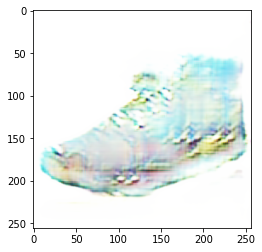

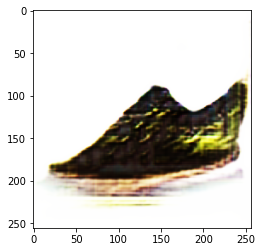

D Real: 0.07242368161678314, D Fake: 0.07702044397592545, G All: 2.0542421340942383
D Real: 0.03373676538467407, D Fake: 0.43336760997772217, G All: 2.2805423736572266
D Real: 0.04719804972410202, D Fake: 0.13569794595241547, G All: 2.647639513015747
D Real: 0.10346518456935883, D Fake: 0.08777478337287903, G All: 3.7148561477661133
D Real: 0.035195425152778625, D Fake: 0.04601592570543289, G All: 3.35288667678833
D Real: 1.577986478805542, D Fake: 0.15100249648094177, G All: 3.0171332359313965
D Real: 0.11185726523399353, D Fake: 0.18377646803855896, G All: 3.2143139839172363
D Real: 0.17628788948059082, D Fake: 0.11411473155021667, G All: 2.085270404815674
D Real: 0.09480763971805573, D Fake: 0.35351425409317017, G All: 2.3441028594970703
D Real: 0.2191426008939743, D Fake: 0.26168960332870483, G All: 2.4275341033935547
D Real: 0.47515302896499634, D Fake: 0.18591219186782837, G All: 2.4097325801849365
D Real: 0.23635584115982056, D Fake: 0.13928060233592987, G All: 2.316925048828125

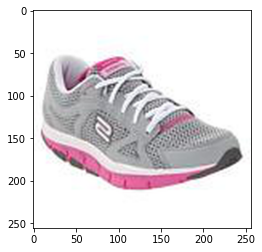

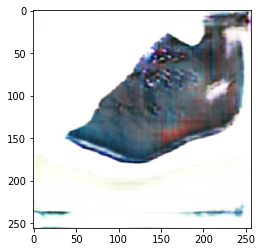

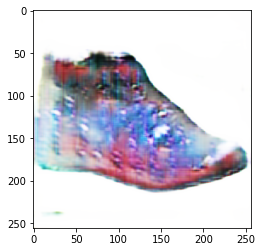

D Real: 0.38201045989990234, D Fake: 0.05995897948741913, G All: 4.485591888427734
D Real: 0.10088075697422028, D Fake: 0.055343903601169586, G All: 5.157503128051758
D Real: 1.2210205793380737, D Fake: 0.05192011222243309, G All: 3.9342617988586426
D Real: 0.05492912232875824, D Fake: 0.1491299718618393, G All: 4.200244903564453
D Real: 1.0829567909240723, D Fake: 0.2710697650909424, G All: 3.6723790168762207
D Real: 0.1218976154923439, D Fake: 0.23055876791477203, G All: 2.935389995574951
D Real: 0.15674728155136108, D Fake: 0.49930328130722046, G All: 2.707906484603882
D Real: 0.0328584648668766, D Fake: 0.27092140913009644, G All: 2.3727598190307617
D Real: 0.27439650893211365, D Fake: 0.3406410217285156, G All: 3.2474684715270996
D Real: 0.07190953195095062, D Fake: 0.11817319691181183, G All: 3.178676128387451
D Real: 0.03223945572972298, D Fake: 0.26548758149147034, G All: 2.19270920753479
D Real: 0.2129654884338379, D Fake: 0.1024748757481575, G All: 2.095874309539795
D Real: 0

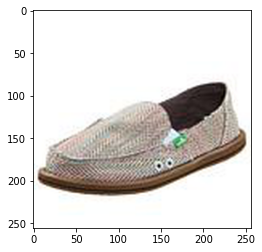

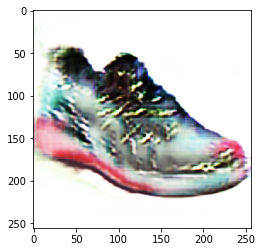

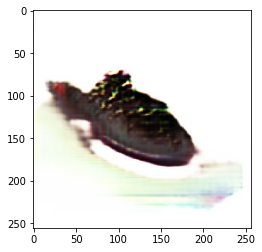

D Real: 0.2766609787940979, D Fake: 0.03685282543301582, G All: 5.144317626953125
D Real: 0.841071605682373, D Fake: 0.04303663969039917, G All: 4.9526591300964355
D Real: 0.07755309343338013, D Fake: 0.04172203689813614, G All: 5.042084217071533
D Real: 0.3045373260974884, D Fake: 0.04443047568202019, G All: 3.5272045135498047
D Real: 0.2921024262905121, D Fake: 0.1584625095129013, G All: 3.2247393131256104
D Real: 0.11492201685905457, D Fake: 0.23450934886932373, G All: 2.7507362365722656
D Real: 0.19627870619297028, D Fake: 0.4898641109466553, G All: 1.9183992147445679
D Real: 0.05691443756222725, D Fake: 0.3417292535305023, G All: 1.7882936000823975
D Real: 0.04851516708731651, D Fake: 0.49718567728996277, G All: 2.317246913909912
D Real: 0.8293722867965698, D Fake: 0.15648898482322693, G All: 2.7977700233459473
D Real: 0.07069717347621918, D Fake: 0.1157049760222435, G All: 3.6655526161193848
D Real: 0.06866121292114258, D Fake: 0.12844818830490112, G All: 3.565246105194092
D Real

In [ ]:

os.mkdir('Results')
os.mkdir('Models')
#if training new model:
model = Model_GAN() 
model.GAN.D.summary()
model.GAN.G.summary()
print("Begin in training")

while(model.GAN.steps < 68000):#500000
    model.train()
    if model.GAN.steps % 500 == 0:
        print("\nRound: " + str(model.GAN.steps))
    if model.GAN.steps % 1000 == 0:
        print("\n\n\n\nRound " + str(model.GAN.steps) + ":")
        model.eval2(int(model.GAN.steps / 1000))